In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
ticket=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')

In [8]:
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
ticket.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
ticket.dropna(inplace=True)

In [12]:
ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [13]:
ticket.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [26]:
ticket.replace(to_replace=['non-stop','Banglore','Air Asia','1 Long layover'],value=0,inplace=True)
ticket.replace(to_replace=['1 stop','Chennai','Air India','1 Short layover'],value=1,inplace=True)
ticket.replace(to_replace=['2 stops','Delhi','GoAir','2 Long layover'],value=2,inplace=True)
ticket.replace(to_replace=['3 stops','Kolkata','IndiGo','Business class'],value=3,inplace=True)
ticket.replace(to_replace=['4 stops','Mumbai','Jet Airways','Change airports'],value=4,inplace=True)
ticket.replace(to_replace=['Cochin','Jet Airways Business','In-flight meal not included'],value=5,inplace=True)
ticket.replace(to_replace=['Hyderabad','Multiple carriers','No check-in baggage included'],value=6,inplace=True)
ticket.replace(to_replace=['New Delhi','Multiple carriers Premium economy','No info','No Info'],value=7,inplace=True)
ticket.replace(to_replace=['SpiceJet','Red-eye flight'],value=8,inplace=True)
ticket.replace(to_replace=['Trujet'],value=9,inplace=True)
ticket.replace(to_replace=['Vistara'],value=10,inplace=True)
ticket.replace(to_replace=['Vistara Premium economy'],value=11,inplace=True)

In [27]:
ticket.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,7,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,7,3897
1,1,1/05/2019,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7,7662
2,4,9/06/2019,2,5,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,7,13882
3,3,12/05/2019,3,0,CCU → NAG → BLR,18:05,23:30,5h 25m,1,7,6218
4,3,01/03/2019,0,7,BLR → NAG → DEL,16:50,21:35,4h 45m,1,7,13302


In [28]:
ticket['Additional_Info'].value_counts()

7    8347
5    1982
6     320
0      19
4       7
3       4
2       1
1       1
8       1
Name: Additional_Info, dtype: int64

In [29]:
ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  int64 
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  int64 
 3   Destination      10682 non-null  int64 
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  int64 
 9   Additional_Info  10682 non-null  int64 
 10  Price            10682 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1001.4+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [23]:
test.replace(to_replace=['non-stop','Banglore','Air Asia','1 Long layover'],value=0,inplace=True)
test.replace(to_replace=['1 stop','Chennai','Air India','1 Short layover'],value=1,inplace=True)
test.replace(to_replace=['2 stops','Delhi','GoAir','2 Long layover'],value=2,inplace=True)
test.replace(to_replace=['3 stops','Kolkata','IndiGo','Business class'],value=3,inplace=True)
test.replace(to_replace=['4 stops','Mumbai','Jet Airways','Change airports'],value=4,inplace=True)
test.replace(to_replace=['Cochin','Jet Airways Business','In-flight meal not included'],value=5,inplace=True)
test.replace(to_replace=['Hyderabad','Multiple carriers','No check-in baggage included'],value=6,inplace=True)
test.replace(to_replace=['New Delhi','Multiple carriers Premium economy','No info'],value=7,inplace=True)
test.replace(to_replace=['SpiceJet','Red-eye flight'],value=8,inplace=True)
test.replace(to_replace=['Trujet'],value=9,inplace=True)
test.replace(to_replace=['Vistara'],value=10,inplace=True)
test.replace(to_replace=['Vistara Premium economy'],value=11,inplace=True)

In [20]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,6/06/2019,2,5,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,7
1,IndiGo,12/05/2019,3,0,CCU → MAA → BLR,06:20,10:20,4h,1,7
2,4,21/05/2019,2,5,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,5
3,6,21/05/2019,2,5,DEL → BOM → COK,08:00,21:00,13h,1,7
4,0,24/06/2019,0,2,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,7


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   int64 
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   int64 
 3   Destination      2671 non-null   int64 
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   int64 
 9   Additional_Info  2671 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 208.8+ KB


In [31]:
ticket.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [32]:
test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [33]:
ticket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int64
 1   Source           10682 non-null  int64
 2   Destination      10682 non-null  int64
 3   Total_Stops      10682 non-null  int64
 4   Additional_Info  10682 non-null  int64
 5   Price            10682 non-null  int64
dtypes: int64(6)
memory usage: 584.2 KB


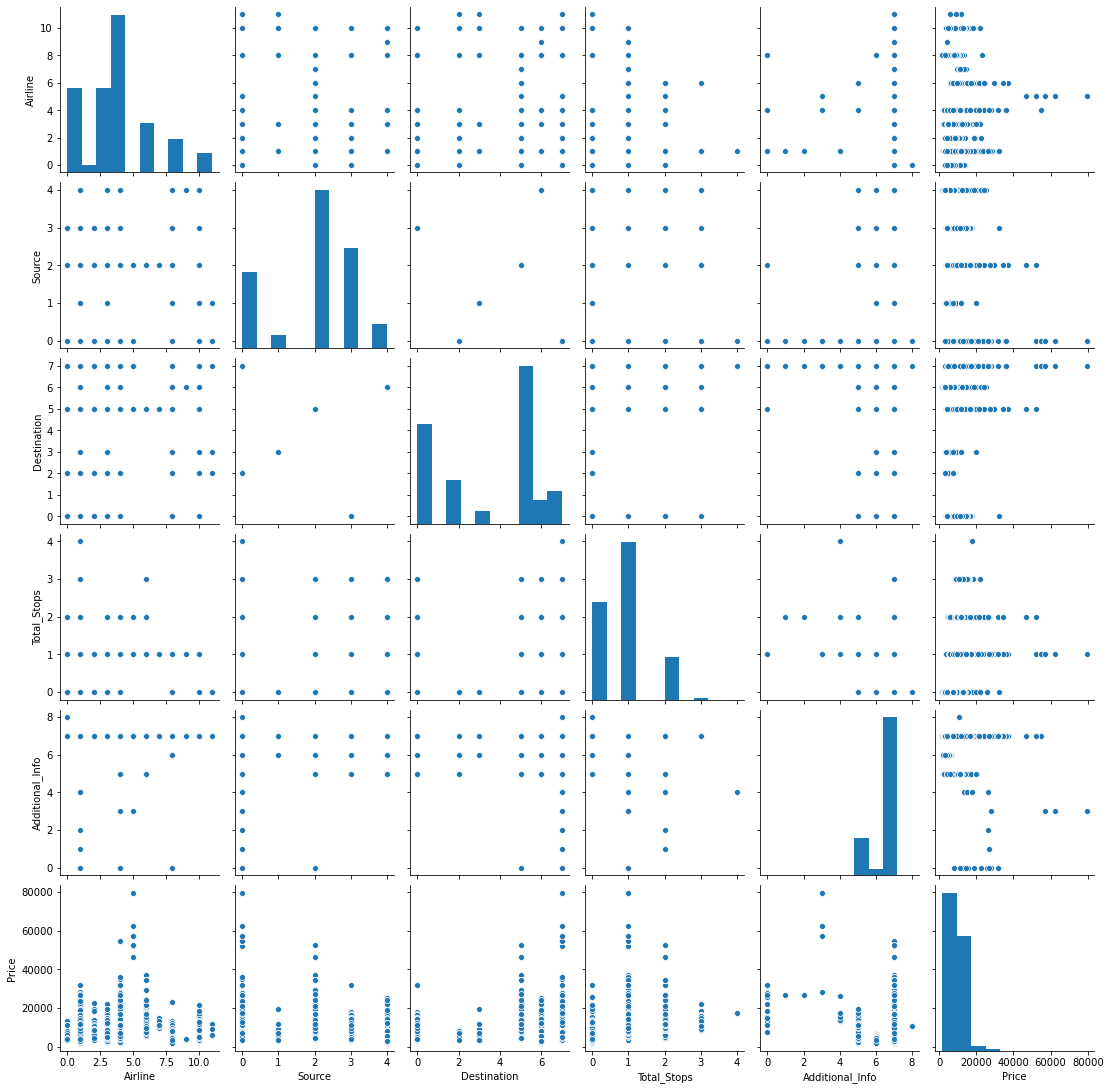

In [44]:
sns.pairplot(ticket)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int64
 1   Source           2671 non-null   int64
 2   Destination      2671 non-null   int64
 3   Total_Stops      2671 non-null   int64
 4   Additional_Info  2671 non-null   int64
dtypes: int64(5)
memory usage: 104.5 KB


In [36]:
X=ticket.drop(['Price'], axis=1).values
y=ticket['Price'].values

In [37]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [38]:
lin_reg=LinearRegression(fit_intercept=True)

In [39]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [40]:
print('Linear Model Coeff m:{}'.format(lin_reg.coef_))
print('Linear Model Intercept c: {}'.format(lin_reg.intercept_))

Linear Model Coeff m:[ 159.92660246 -349.90637487   90.29792235 4323.73702114 -135.41227403]
Linear Model Intercept c: 6146.106413300089


In [41]:
y_predict=lin_reg.predict(X_test)

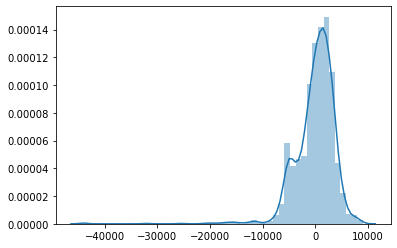

In [42]:
sns.distplot((y_predict-y_test))

In [45]:
y_predict

array([9382.76934953, 9111.94480147, 9382.76934953, ..., 6310.08575892,
       9751.65121132, 6398.62070697])

In [46]:
y_test

array([ 6224, 14151, 10539, ...,  6144,  7804,  3597], dtype=int64)

In [51]:
y_predict=lin_reg.predict(test)

In [52]:
y_predict

array([ 9913.34078808,  8952.01819901, 10184.16533614, ...,
        9913.34078808,  9433.5609807 , 10233.19399301])

In [53]:
y_predict.shape

(2671,)

In [54]:
predict=pd.DataFrame(data=y_predict)

In [55]:
predict.head()

,0
0,9913.340788
1,8952.018199
2,10184.165336
3,10233.193993
4,5378.816340


In [58]:
predict.to_csv('solution.csv',index=False)